Imports, options, load marathon data


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)
# Set the option to display more width (scroll to the right)
pd.set_option('display.width', 1000)

# import data file:
df_marathon = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/refs/heads/main/data/2025_chicago_results.csv", index_col="BIB")

print('df_marathon.columns:', df_marathon.columns)


df_marathon.columns: Index(['name_(ctz)', 'short', 'gender', 'city,_state', 'bib', 'division', 'start_time', 'place_overall', 'place_gender', 'place_division', 'last_split', '05k', '10k', '15k', '20k', 'half', '25k', '30k', 'mile_20', 'mile_21', '35k', 'mile_22', 'mile_23', 'mile_24', '40k', 'mile_25', 'mile_25.2', 'finish', 'half_2', 'finish_tod', '05k_hours', '10k_hours', '15k_hours', '20k_hours', 'half_hours', '25k_hours', '30k_hours', 'mile_20_hours', 'mile_21_hours', '35k_hours', 'mile_22_hours', 'mile_23_hours', 'mile_24_hours', '40k_hours', 'mile_25_hours', 'mile_25.2_hours', 'finish_hours', 'half_2_hours', '05k_pace', '10k_pace', '15k_pace', '20k_pace', '25k_pace', '30k_pace', '35k_pace', '40k_pace', 'splits_mean', 'splits_std', 'start_place', 'finish_place', 'num_passed'], dtype='object')


Exploratory data analysis:
- explore some columns/values
- use groups of columns together

In [ ]:
columns = ['name_(ctz)', 'gender', 'division', 'place_overall', 'finish']
time_columns = ['05k_hours', '10k_hours', '15k_hours', '20k_hours',
       'half_hours', '25k_hours', '30k_hours', 'mile_20_hours',
       'mile_21_hours', '35k_hours', 'mile_22_hours', 'mile_23_hours',
       'mile_24_hours', '40k_hours', 'mile_25_hours', 'mile_25.2_hours',
       'finish_hours', 'half_2_hours']
pace_columns = ['05k_pace', '10k_pace', '15k_pace',
       '20k_pace', '25k_pace', '30k_pace', '35k_pace', '40k_pace']




Exploratory analysis: scatter plots

Add: coloring by category

In [1]:
## basic scatter plot without coloring


Correlation and heatmap

              finish_hours  05k_pace  40k_pace  splits_std  start_place  finish_place  num_passed
finish_hours      1.000000  0.868958  0.926074    0.578183     0.802311      0.958441   -0.383022
05k_pace          0.868958  1.000000  0.719469    0.322736     0.746073      0.858664   -0.276848
40k_pace          0.926074  0.719469  1.000000    0.805221     0.702405      0.886449   -0.441975
splits_std        0.578183  0.322736  0.805221    1.000000     0.335769      0.533916   -0.485127
start_place       0.802311  0.746073  0.702405    0.335769     1.000000      0.916920    0.203814
finish_place      0.958441  0.858664  0.886449    0.533916     0.916920      1.000000   -0.203814
num_passed       -0.383022 -0.276848 -0.441975   -0.485127     0.203814     -0.203814    1.000000


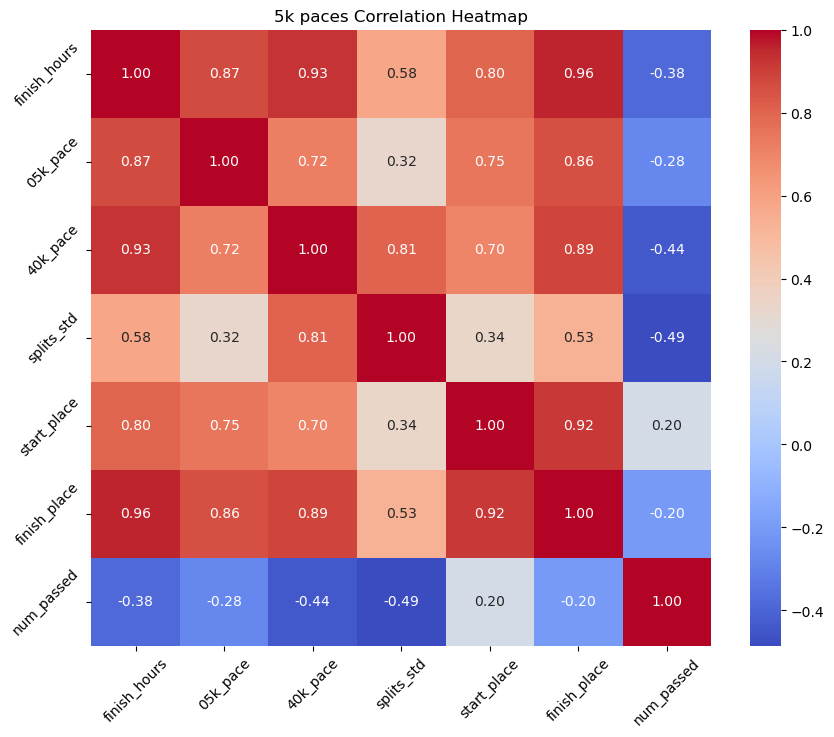

In [ ]:

# correlation matrix of paces:


Grouping data by gender

                 count      mean       std       min       25%       50%       75%        max
gender                                                                                       
Man            29530.0  4.111847  1.003142  2.039722  3.347222  3.930694  4.730417  10.039167
Non-binary       143.0  4.584396  1.199813  2.475278  3.543750  4.502500  5.525972   7.429722
Not specified     63.0  4.521671  1.085954  2.610556  3.796944  4.364722  5.022361   8.832778
Woman          24533.0  4.670430  1.021252  2.249167  3.890000  4.548889  5.332778   9.091944


<AxesSubplot:xlabel='gender'>

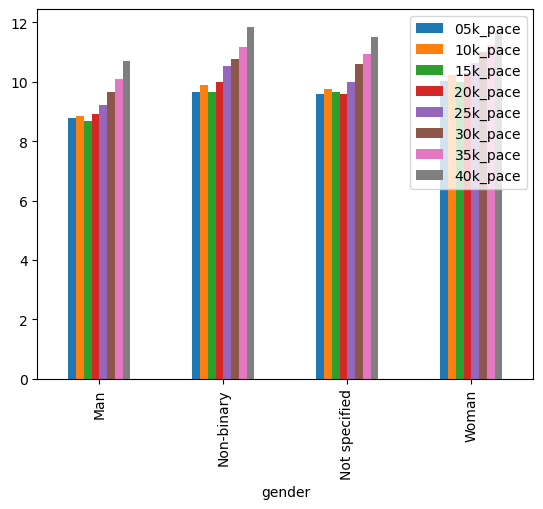

In [49]:
## Example 1: group by gender
# df_marathon['finish_hours'].hist(by=df_marathon['gender'], bins=200, ) 
grouped = df_marathon.groupby('gender')
print(grouped['finish_hours'].describe())

## mean finish time by group
# grouped['finish_hours'].mean().plot(kind='bar')
# plt.ylabel('finish_hours')

# ## histogram of finish time by group
# grouped['finish_hours'].hist(bins=200, alpha=0.5 )
# plt.title('finish time in hours')
# plt.ylabel('count')

# print(grouped['finish_hours'].mean())


# plot of 5k paces by group
# grouped[pace_columns].mean().plot()
grouped[pace_columns].mean().plot(kind='bar')


Grouping data by gender, division

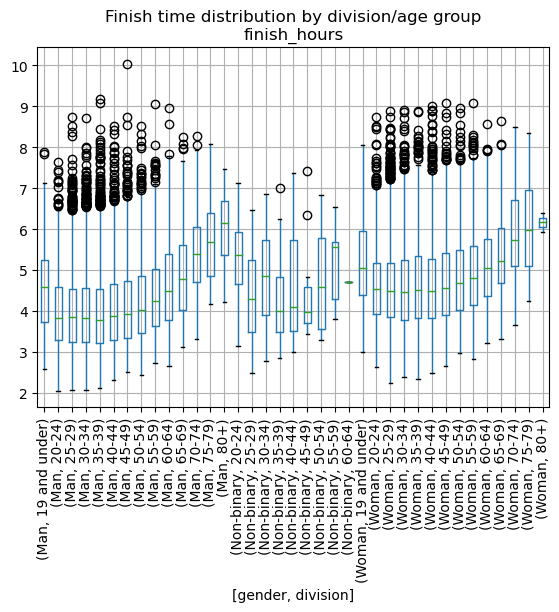

                         counts  finish_hours_mean     90pct     75pct     50pct     25pct     10pct
gender     division                                                                                 
Man        19 and under     120           4.549646  03:08:15  03:43:30  04:34:45  05:14:07  06:03:48
           20-24           1201           3.984570  02:49:15  03:16:40  03:49:49  04:35:02  05:19:56
           25-29           4120           3.965464  02:48:53  03:15:08  03:50:39  04:32:13  05:16:45
           30-34           4783           3.973619  02:49:23  03:14:06  03:49:48  04:32:52  05:23:33
           35-39           4649           3.967871  02:52:13  03:12:24  03:46:57  04:32:51  05:22:36
           40-44           4327           4.052718  02:57:12  03:16:58  03:52:07  04:38:56  05:28:46
           45-49           3635           4.115298  03:01:35  03:20:29  03:55:37  04:43:09  05:31:18
           50-54           2875           4.251720  03:09:51  03:28:12  04:01:24  04:51:26 

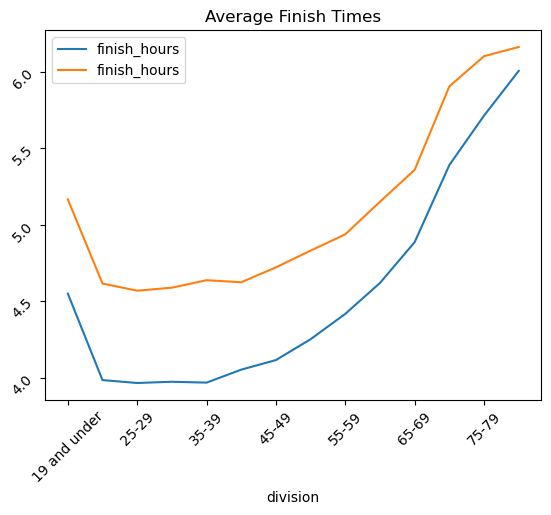

In [56]:
def format_hh_mm_ss(hours):
    '''Convert an a value in hours to HH:MM:SS formatting.'''
    h = int(hours)
    m = (hours - h) * 60
    s = (m - int(m)) * 60
    m = int(m)
    s = int(s)
    
    return f"{h:02}:{m:02}:{s:02}"

# SECOND EXAMPLE: boxplot by gender/age group
# df_groups_by_div_ag['finish_hours_mean'].boxplot()
df_marathon.boxplot(column=['finish_hours'],
               by=['gender','division'],
               rot=90)
plt.suptitle("Finish time distribution by division/age group")
plt.show()# print(df_marathon.columns)

## grouping by gender, division
grouped = df_marathon.groupby(['gender', 'division'])
# print(grouped['finish_hours'].describe())

## explore index of grouped data
# print(grouped['finish_hours'].mean().index)

## extract mean times for division by gender
# print(grouped['finish_hours'].mean().loc['Man'])
ax = grouped['finish_hours'].mean().loc['Man'].plot(legend=True)
ax = grouped['finish_hours'].mean().loc['Woman'].plot(legend=True)
ax.tick_params(axis='x', labelrotation=45) # Rotate by 45 degrees
ax.tick_params(axis='y', labelrotation=45) # Rotate by 45 degrees
plt.title('Average Finish Times')

## find quantiles / explore BQ times??
df_groups_by_div_ag = pd.DataFrame(index=grouped['finish_hours'].mean().index)
df_groups_by_div_ag['counts'] = grouped['start_time'].count()
df_groups_by_div_ag['finish_hours_mean'] = grouped['finish_hours'].mean()
df_groups_by_div_ag['90pct'] = grouped['finish_hours'].quantile(0.1).apply(format_hh_mm_ss)
df_groups_by_div_ag['75pct'] = grouped['finish_hours'].quantile(0.25).apply(format_hh_mm_ss)
df_groups_by_div_ag['50pct'] = grouped['finish_hours'].quantile(0.5).apply(format_hh_mm_ss)
df_groups_by_div_ag['25pct'] = grouped['finish_hours'].quantile(0.75).apply(format_hh_mm_ss)
df_groups_by_div_ag['10pct'] = grouped['finish_hours'].quantile(0.9).apply(format_hh_mm_ss)
print(df_groups_by_div_ag)


